In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'grp'

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


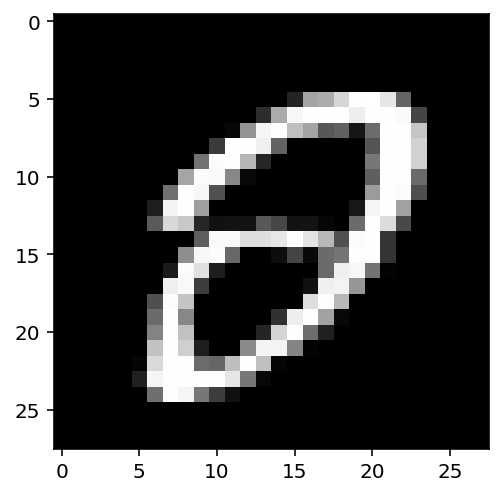

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [5]:
def activation(x):
    return 1 / (1 + torch.exp(-x))


def multi_layer_NW(inputUnits, hiddenUnits, outputUnits):
    torch.manual_seed(7)
    
    n_input = inputUnits
    n_hidden = hiddenUnits
    n_output = outputUnits
    
    # weights
    w1 = torch.randn(n_input, n_hidden)
    w2 = torch.randn(n_hidden, n_output)
    
    #bias
    b1 = torch.randn(1,n_hidden)
    b2 = torch.randn(1,n_output)
    
    return w1,w2,b1,b2

def calc_output(features,w1,w2,b1,b2):
    h = activation(torch.matmul(features, w1).add_(b1))
    output = activation(torch.matmul(h,w2).add_(b2))
    return(output)

features = torch.flatten(images,start_dim=1)
w1,w2,b1,b2 = multi_layer_NW(features.shape[1],256,10)

out = calc_output(features,w1,w2,b1,b2)

In [11]:
def softmax(x):
    num = torch.exp(x)
    den = torch.sum(torch.exp(x), dim = 0)
    return num/den

probabilities = softmax(out)


print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([0.1838, 0.1829, 0.1363, 0.1288, 0.1615, 0.1580, 0.1493, 0.1358, 0.1844,
        0.1548, 0.1713, 0.1608, 0.1501, 0.1740, 0.1673, 0.1442, 0.1533, 0.1549,
        0.1441, 0.1541, 0.1548, 0.1407, 0.1793, 0.1393, 0.1721, 0.1445, 0.1579,
        0.1733, 0.1581, 0.1491, 0.1441, 0.1475, 0.1502, 0.1431, 0.1632, 0.1474,
        0.1280, 0.1583, 0.1596, 0.1454, 0.2029, 0.1443, 0.1454, 0.1488, 0.1742,
        0.1515, 0.1384, 0.1523, 0.1460, 0.1616, 0.1647, 0.1696, 0.1509, 0.1552,
        0.1611, 0.1651, 0.1546, 0.1556, 0.1494, 0.1615, 0.1839, 0.1661, 0.1450,
        0.1461])


In [55]:
def Relu(x):
    if x < 0:
        return 0
    else:
        return x

In [56]:
from torch import nn

In [64]:
class Network(nn.ReLU):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.Relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.Relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x
    

In [65]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (Relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [66]:
import torch.nn.functional as F
class Network(nn.ReLU):
    def __init__():
        super().__init__()
        
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self, x):
        
        x = F.Relu(self.fc1(x))
        x = F.Relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

In [67]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0285, -0.0028,  0.0297,  ..., -0.0323,  0.0167, -0.0010],
        [-0.0196, -0.0263,  0.0145,  ...,  0.0261,  0.0014,  0.0096],
        [ 0.0144,  0.0291, -0.0027,  ..., -0.0251,  0.0026, -0.0147],
        ...,
        [-0.0263,  0.0151, -0.0285,  ...,  0.0191,  0.0010,  0.0089],
        [-0.0297,  0.0248, -0.0184,  ..., -0.0235,  0.0150,  0.0055],
        [ 0.0321,  0.0311, -0.0267,  ...,  0.0292,  0.0259, -0.0036]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0207, -0.0032, -0.0208, -0.0078, -0.0290, -0.0233,  0.0337, -0.0214,
         0.0321, -0.0335, -0.0017, -0.0083,  0.0071,  0.0112, -0.0254,  0.0162,
        -0.0291, -0.0189,  0.0181, -0.0013,  0.0179, -0.0161,  0.0319, -0.0280,
        -0.0100,  0.0176,  0.0027, -0.0107, -0.0091, -0.0248, -0.0355, -0.0098,
        -0.0303, -0.0040, -0.0034, -0.0304,  0.0351,  0.0229, -0.0321,  0.0096,
         0.0107, -0.0265,  0.0243,  0.0062, -0.0144, -0.0063,  0.0272,  0.0248,
         0.0156

In [68]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0116,  0.0019, -0.0023,  ...,  0.0147,  0.0072,  0.0055],
        [ 0.0043, -0.0018, -0.0089,  ...,  0.0001, -0.0050,  0.0118],
        [-0.0012,  0.0118, -0.0002,  ..., -0.0142, -0.0006,  0.0046],
        ...,
        [-0.0156, -0.0005, -0.0017,  ...,  0.0006,  0.0088,  0.0078],
        [ 0.0052, -0.0022,  0.0095,  ..., -0.0046, -0.0087, -0.0053],
        [ 0.0008,  0.0146, -0.0227,  ...,  0.0134,  0.0013, -0.0045]])

In [78]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
#helper.view_classify(img.view(1, 28, 28), ps)

In [81]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
#helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [80]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0298,  0.0304, -0.0296,  ..., -0.0272,  0.0090, -0.0264],
        [-0.0154,  0.0288, -0.0014,  ...,  0.0160, -0.0195,  0.0278],
        [ 0.0066, -0.0283, -0.0170,  ...,  0.0011, -0.0098,  0.0352],
        ...,
        [-0.0080, -0.0352, -0.0181,  ...,  0.0279, -0.0076,  0.0036],
        [ 0.0137,  0.0285,  0.0202,  ...,  0.0149,  0.0033, -0.0273],
        [-0.0155, -0.0011, -0.0348,  ...,  0.0157,  0.0056,  0.0097]],
       requires_grad=True)

In [82]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [83]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
